In [1]:
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Plotly and Cufflinks
import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)


from IPython.display import Image

pd.options.display.max_rows=20

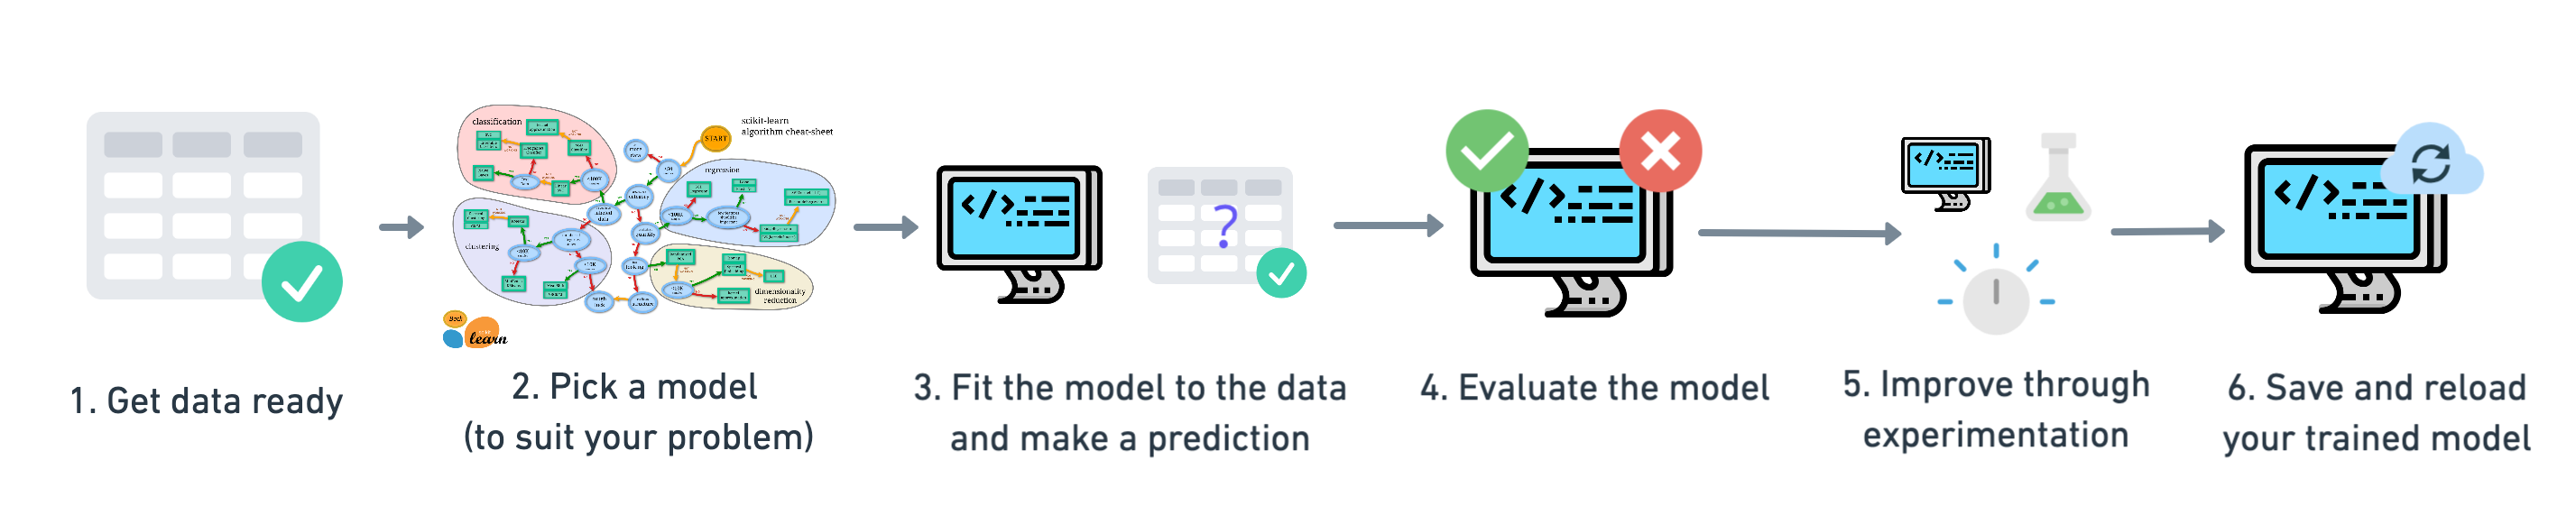

In [2]:
Image(filename='sklearn-workflow.png')

In [3]:
data = pd.read_csv('heart-disease.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
X = data.drop('target', axis=1)
Y = data[['target']]

In [23]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.1 (default, Dec 28 2020, 11:24:06)  [Clang 12.0.0 (clang-1200.0.32.28)]
executable: /usr/local/Cellar/jupyterlab/3.0.0_1/libexec/bin/python
   machine: macOS-10.15.7-x86_64-i386-64bit

Python dependencies:
          pip: 20.3.1
   setuptools: 51.0.0
      sklearn: 0.24.0
        numpy: 1.19.4
        scipy: 1.6.0
       Cython: None
       pandas: 1.2.0
   matplotlib: 3.3.3
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state =0)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(n_estimators=100)

In [22]:
clf.fit(X_train,Y_train.values.ravel());

In [12]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
#make a prediction

In [14]:
y_label = clf.predict(X_test)

In [15]:
clf.score(X_train,Y_train)

1.0

In [16]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [17]:
print(classification_report(Y_test,y_label))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [18]:
print(confusion_matrix(Y_test,y_label))

[[33 11]
 [ 4 43]]


In [19]:
print(accuracy_score(Y_test,y_label))

0.8351648351648352


In [20]:
#Improve the model
#try different number of estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with{i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100:.2f}%")
    print(" ")

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Trying model with10 estimators...
Model accuracy on test set: 84.62%
 
Trying model with20 estimators...
Model accuracy on test set: 81.32%
 
Trying model with30 estimators...
Model accuracy on test set: 83.52%
 
Trying model with40 estimators...
Model accuracy on test set: 83.52%
 
Trying model with50 estimators...


<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy on test set: 82.42%
 
Trying model with60 estimators...
Model accuracy on test set: 82.42%
 
Trying model with70 estimators...
Model accuracy on test set: 84.62%
 
Trying model with80 estimators...


<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-20-81a521adee48>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy on test set: 82.42%
 
Trying model with90 estimators...
Model accuracy on test set: 83.52%
 


In [21]:
import pickle